<a href="https://colab.research.google.com/github/Savitanna/sberbank_data_analysis_06_07_21/blob/master/hw_pandas_1_Savitskaya_AV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Анализ причин выжимаемости на Титанике
сначала был этап загрузки и обработки данных, а потом гипотезы (см ниже)

## Шаблон исследования

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ЭТАП 0: загрузка данных 
my_path_dir="/content/drive/My Drive/Colab Notebooks/data/"
pd.options.display.max_rows = 4

train_1=pd.read_csv(filepath_or_buffer = my_path_dir+"train.csv", sep = ',', engine='python', index_col=False)
train_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
...,...,...,...,...,...,...,...,...,...,...,...,...
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [ ]:
pd.options.display.max_rows = 12
train_1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
pd.options.display.max_rows = 14
train_1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Sex_1            int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Embarked_1     float64
dtype: object

In [ ]:
# переводим типы переменных Sex и Fare из типа object в тип int для упрощения дальнейшей обработки

# создаем колонку, где значения пола переведены в числа: male=0, female=1
level_map_sex = {"male": 0, "female": 1}
train_1.insert(5, 'Sex_1', train_1["Sex"].map(level_map_sex))
# создаем колонку, где переводим Embarked в числовые данные
level_map_embarked= {"C": 0, "Q": 1, "S": 2}
train_1.insert(13, 'Embarked_1', train_1["Embarked"].map(level_map_embarked))

train_1


,PassengerId,Survived,Pclass,Name,Sex,Sex_1,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_1
0,1,0,3,"Braund, Mr. Owen Harris",male,0,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,0,35.0,0,0,373450,8.0500,NaN,S,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,27.0,0,0,211536,13.0000,NaN,S,2.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,19.0,0,0,112053,30.0000,B42,S,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,NaN,1,2,W./C. 6607,23.4500,NaN,S,2.0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,26.0,0,0,111369,30.0000,C148,C,0.0


In [ ]:
train_1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
                ...   
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Embarked_1     float64
Length: 14, dtype: object

In [ ]:
# выбираем для дальнейшего анализа только столбцы с числовыми значениями
train_2=train_1.select_dtypes(include=["float64", "int64"]).copy()
# удаляем столбец PassengerId, т.к. он дублируется с индексом массива
train_2.drop(['PassengerId'], axis='columns', inplace=True)
train_2

,Survived,Pclass,Sex_1,Age,SibSp,Parch,Fare,Embarked_1
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,2.0
887,1,1,1,19.0,0,0,30.0000,2.0
888,0,3,1,NaN,1,2,23.4500,2.0
889,1,1,0,26.0,0,0,30.0000,0.0


In [ ]:
train_2.describe()

,Survived,Pclass,Sex_1,Age,SibSp,Parch,Fare,Embarked_1
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.535433
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [ ]:
# ЭТАП: графики исходных данных
import matplotlib
import matplotlib.pyplot as plt
# функция для построения гистограмм для числовых/бинарных переменных
def func_Graph_Hist_Data(var_transactions_for_Hist):
  fig = plt.figure(figsize=(16,8))
  cols = 3

  rows = np.ceil(float(var_transactions_for_Hist.shape[1]) / cols)
  for i, column in enumerate(var_transactions_for_Hist.columns):
      ax = fig.add_subplot(rows, cols, i + 1)
      ax.set_title(column)
      var_transactions_for_Hist[column].hist(axes=ax)
      # делаем не более 10 меток по оси Х
      #var_X_max=var_transactions_for_Hist[column].max()
      #var_X_min=var_transactions_for_Hist[column].min()
      #var_step_X=round((var_X_max-var_X_min)/10, 2)
      #plt.xticks(ticks=np.arange(var_X_min, var_X_max+var_step_X, var_step_X), rotation="vertical")
      plt.xticks(rotation="vertical")
      plt.subplots_adjust(hspace=0.7, wspace=0.2)

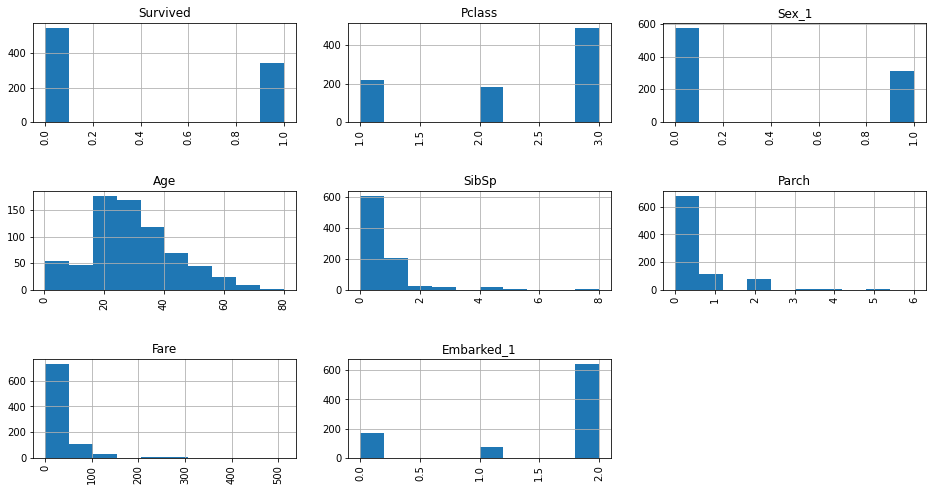

In [ ]:
# строим гистограммы для числовых переменных
func_Graph_Hist_Data(train_2[train_2._get_numeric_data().columns])

### Гипотеза 1

__Формулировка__:

Гипотеза 1: выживших пассажиров больше всего в 1 классе  

In [ ]:
# Код для проверки гипотезы

###
train_3=train_2.copy()
# функция для подсчета количества выживших/невыживших в каждой категории
def func_survived_count(x):
    return x.value_counts()
# функция для подсчета доли выживших/невыживших в каждой категории
def func_survived_count_part(x):
    return x.value_counts()/891

train_4=train_3.groupby(['Survived', 'Pclass'])['Survived']\
                                                .agg([('Count',func_survived_count), ('Count_part',func_survived_count_part)])\
                                                .sort_index()
train_4


Count  Count_part
Survived Pclass                   
0        1          80    0.089787
         2          97    0.108866
         3         372    0.417508
1        1         136    0.152637
         2          87    0.097643
         3         119    0.133558

__Вывод__:

Гипотеза подтвердилась - среди выживших (Survived=1) больше всего пассажиров 1 класса. Но на 2 месте - пассажиры 3 класса. Вероятно это связано с тем, что пассажиров в 3 классе было более половины всех пассажиров корабля (55%).
Данная статистика также показывает, что чем выше класс, тем выше процент выживших:
в 1 классе выжило больше половины - 136 человек из 216 (136+80)
во 2 классе выжило чуть меньше половины - 87 человек из 184 (87+97)
в 3 классе выжило около 25% - 119 человек из 491 (119 + 372)    

###  Гипотеза 2

__Формулировка__:

Гипотеза 2: среди выживших женщин больше, чем мужчин в разрезе классов пассажиров 

In [ ]:
# Код для проверки гипотезы

###
# Sex_1: 0- мужчины, 1 женщины
train_5=train_3.groupby(['Sex_1', 'Survived', 'Pclass'])['Survived']\
                                                .agg([('Count',func_survived_count), ('Count_part',func_survived_count_part)])\
                                                .sort_index()
train_5

Count  Count_part
Sex_1 Survived Pclass                   
0     0        1          77    0.086420
               2          91    0.102132
               3         300    0.336700
      1        1          45    0.050505
               2          17    0.019080
               3          47    0.052750
1     0        1           3    0.003367
               2           6    0.006734
               3          72    0.080808
      1        1          91    0.102132
               2          70    0.078563
               3          72    0.080808

__Вывод__:

Гипотеза в целом подтвердилась - среди выживших наибольшую долю занимают женщины.
Интересна разбивка по классам пассажиров:
1 класс: почти все выжившие - женщины (91 человек из 94)
2 класс: также почти все выжившие - это женщины (70 человек из 76)
Можно предположить что мужчины, выжившие в 1 и 2 классе, это несовершеннолетние.
3 класс: количество выживших женщин и мужчин - одинаковое 72. При этом в 3 классе погибло 47 женщин.  

### Гипотеза 3
 
__Формулировка__:

Гипотеза 3: наибольший процент выживших среди детей (менее 18 лет)  

In [ ]:
# Код для проверки гипотезы

### делаем выборку выживших и не выживших до 18 лет
train_6=train_3[train_3.Age<18]
train_6
# Sex_1: 0- мужчины, 1 женщины
def func_survived_count_part_c(x):
    return x.value_counts()/113
train_7=train_6.groupby(['Sex_1', 'Survived', 'Pclass'])['Survived']\
                                                .agg([('Count',func_survived_count), ('Count_part',func_survived_count_part_c)])\
                                                .sort_index()
train_7

Count  Count_part
Sex_1 Survived Pclass                   
0     0        2           2    0.017699
               3          33    0.292035
      1        1           4    0.035398
               2           9    0.079646
               3          10    0.088496
1     0        1           1    0.008850
               3          16    0.141593
      1        1           7    0.061947
               2          12    0.106195
               3          19    0.168142

__Вывод__:

Гипотеза не подтвердилась: среди детей (113 человек) выжило около 48% или 55 человек.
Причем среди выживших в 1 классе выжил только 1 мальчик, что означает, что другие 2 мужчины из 1 класса - взрослые и им более 18 лет (см Гипотезу 2).
Во 2 классе вообще нет выживших мальчиков.
В разрезе пола: наибольший процент выживших - это девочки.  

### Вывод исследования:

  